In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = 128
batch_size = 32

# Define the path for the zip file and the extraction directory
zip_file_path = "/content/test_set.zip"
extraction_path = "/content/test_set_extracted"

# Create the extraction directory if it doesn't exist
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

# Unzip the dataset if it hasn't been unzipped yet
# The -q flag is for quiet mode (no output), -o flag is to overwrite files without prompt
# Note: Previous runs indicated potential issues with the integrity of 'test_set.zip'.
!unzip -q -o "{zip_file_path}" -d "{extraction_path}"

# Inspect the extracted contents to determine the correct dataset_root
print(f"Listing contents of {extraction_path}:")
!ls -R "{extraction_path}"

# The `ls -R` output shows that the actual classes (cats, dogs) are under `/content/test_set_extracted/test_set`.
# This means the 'test_set' directory itself acts as the dataset root for the images.
# There are no explicit 'train', 'val', or 'test' subdirectories at the top level of this extracted dataset.
# Therefore, we can only create a generator for the test data, and will point it directly to the 'test_set' directory.
# The `train_data` and `val_data` generators will be commented out as their corresponding directories don't exist.
actual_image_data_root = os.path.join(extraction_path, "test_set")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# The 'train' directory does not exist in the extracted zip based on `ls -R` output.
# train_data = train_datagen.flow_from_directory(
#     os.path.join(actual_image_data_root, "train"),
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     class_mode="categorical"
# )

# The 'val' directory does not exist in the extracted zip based on `ls -R` output.
# val_data = val_datagen.flow_from_directory(
#     os.path.join(actual_image_data_root, "val"),
#     target_size=(img_size, img_size),
#     batch_size=batch_size,
#     class_mode="categorical"
# )

test_data = test_datagen.flow_from_directory(
    actual_image_data_root,  # Point directly to the directory containing 'cats' and 'dogs'
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Listing contents of /content/test_set_extracted:
/content/test_set_extracted:
test_set

/content/test_set_extracted/test_set:
cats  dogs

/content/test_set_extracted/test_set/cats:
 cat.4001.jpg	    cat.4249.jpg       cat.4501.jpg	  cat.4751.jpg
 cat.4002.jpg	    cat.4250.jpg       cat.4502.jpg	  cat.4752.jpg
 cat.4003.jpg	    cat.4251.jpg       cat.4503.jpg	  cat.4753.jpg
 cat.4004.jpg	    cat.4252.jpg       cat.4504.jpg	  cat.4754.jpg
 cat.4005.jpg	    cat.4253.jpg       cat.4505.jpg	  cat.4755.jpg
 cat.4006.jpg	    cat.4254.jpg       cat.4506.jpg	  cat.4756.jpg
 cat.4007.jpg	    cat.4255.jpg       cat.4507.jpg	  cat.4757.jpg
 cat.4008.jpg	    cat.4256.jpg       cat.4508.jpg	  cat.4758.jpg
 cat.4009.jpg	    cat.4257.jpg       cat.4509.jpg	  cat.4759.jpg
 cat.4010.jpg	    cat.4258.jpg       cat.4510.jpg	  cat.4760.jpg
 cat.4011.jpg	    cat.4259.jpg       cat.4511.jpg	  cat.4761.jpg
 cat.4012.jpg	    cat.4260.jpg       cat.4512.jpg	  cat.4762.jpg
 cat.4013.jpg	    cat.4261.jpg       ca

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))  # Changed to 2 classes: cat, dog

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# This cell is now empty as its content has been moved to cell oK5i-0-pA1SU


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    test_data, # Using test_data for training as no separate train_data is available
    epochs=15,
    validation_data=test_data # Using test_data for validation as no separate val_data is available
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 168ms/step - accuracy: 0.5661 - loss: 4.5516 - val_accuracy: 0.4998 - val_loss: 0.6977
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.4295 - loss: 0.7000 - val_accuracy: 0.4884 - val_loss: 0.6933
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.4644 - loss: 0.6943 - val_accuracy: 0.5190 - val_loss: 0.6917
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.5218 - loss: 0.6993 - val_accuracy: 0.4998 - val_loss: 0.6921
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5759 - loss: 0.6910 - val_accuracy: 0.5418 - val_loss: 0.6908
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.4763 - loss: 0.6927 - val_accuracy: 0.6045 - val_loss: 0.6763
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.5705 - loss: 0.6832 - val_accuracy: 0.6312 - val_loss: 0.6716
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 87ms/step - accuracy: 0.5851 - loss: 0.6828 - val_accuracy: 0.5872 

In [ ]:
loss, accuracy = model.evaluate(test_data)
print("Test Accuracy:", accuracy)


64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.6854 - loss: 0.5400
Test Accuracy: 0.7666831612586975


In [ ]:
from google.colab import files

uploaded = files.upload()

img_path = list(uploaded.keys())[0]


Saving WhatsApp Image 2023-12-29 at 07.16.41_90c78ba2.jpg to WhatsApp Image 2023-12-29 at 07.16.41_90c78ba2.jpg


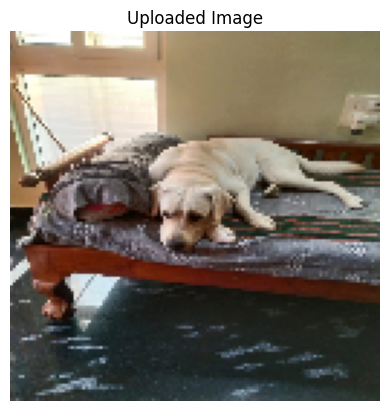

In [ ]:
import matplotlib.pyplot as plt # Added import

img = image.load_img(img_path, target_size=(img_size, img_size))

plt.imshow(img)
plt.axis('off')
plt.title("Uploaded Image")
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

class_names = list(test_data.class_indices.keys()) # Changed train_data to test_data

predicted_class = class_names[np.argmax(prediction)]
confidence = np.max(prediction)

print("Predicted Class:", predicted_class)
print("Confidence:", confidence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Class: dogs
Confidence: 0.51507956
